In [1]:
# | -------------------------------- |
# | EDA - Exploratory Data Analysis  |
# | -------------------------------- |

# Librerías estándar
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sys
import os
sys.path.append(os.path.join(os.getcwd(), '../utils'))

# Módulos personalizados
from toolbox_ML import *
from bootcampviztools import *

# Desactivamos los warnings
import warnings
warnings.simplefilter("ignore")

# Configuración para mejorar la visualización
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = [12, 6]

In [2]:
# Cargar el dataset
df = pd.read_csv("../data_sample/scrap_data_asturias.csv", sep=";")

In [3]:
# Imprimir primeras filas
print("Imprimir primeras filas del dataset:")
df.head()

Imprimir primeras filas del dataset:


,Id del anuncio,Tipo de inmueble,Tipo de vendedor,Barrio,Municipio,Distrito,Precio,Euros/m2,Metros cuadrados construidos,Habitaciones,Baños,Planta,Latitud,Longitud,Ascensor (Sí/No),Obra nueva (Sí/No),Piscina (Sí/No),Terraza (Sí/No),Parking (Sí/No),Parking incluído en el precio (Sí/No),Aire acondicionado (Sí/No),Trastero (Sí/No),Jardín (Sí/No)
0,310905,Duplex,Particular,-,Cangas de Narcea,-,77000.0,1222.0,63,1.0,1.0,3,"43,1746686","-6,5518582",No,No,No,Sí,No,No,No,No,No
1,316842,Piso,Particular,-,Grado,-,80000.0,920.0,87,3.0,1.0,2,"43,3870028","-6,0759685",No,No,No,No,No,No,No,No,No
2,325749,Piso,Particular,-,Aller,-,70000.0,1167.0,60,2.0,1.0,2,"43,1593694","-5,6203693",Sí,No,No,No,No,No,No,Sí,No
3,340311,Piso,Particular,Fozaneldi-Tenderina,Oviedo,Fozaneldi-Tenderina-Ventanielles,110000.0,2750.0,40,1.0,1.0,2,"43,3624612","-5,8325263",Sí,No,No,No,No,No,No,Sí,No
4,400928,Piso,Particular,HUCA-La Cadellada,Oviedo,Corredoria-Huca-Teatinos,160000.0,3333.0,48.0,1.0,1.0,5,"43,3727912","-5,8297483",Sí,No,No,No,No,No,No,No,No


In [4]:
# Información general
print("Información general del dataset:")
df.info()

Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Id del anuncio                         3678 non-null   int64  
 1   Tipo de inmueble                       3678 non-null   object 
 2   Tipo de vendedor                       3678 non-null   object 
 3   Barrio                                 3678 non-null   object 
 4   Municipio                              3678 non-null   object 
 5   Distrito                               3678 non-null   object 
 6   Precio                                 3678 non-null   float64
 7   Euros/m2                               3678 non-null   float64
 8   Metros cuadrados construidos           3678 non-null   object 
 9   Habitaciones                           3678 non-null   float64
 10  Baños                                  

In [5]:
describe_df(df)

,Id del anuncio,Tipo de inmueble,Tipo de vendedor,Barrio,Municipio,Distrito,Precio,Euros/m2,Metros cuadrados construidos,Habitaciones,Baños,Planta,Latitud,Longitud,Ascensor (Sí/No),Obra nueva (Sí/No),Piscina (Sí/No),Terraza (Sí/No),Parking (Sí/No),Parking incluído en el precio (Sí/No),Aire acondicionado (Sí/No),Trastero (Sí/No),Jardín (Sí/No)
DATA_TYPE,int64,object,object,object,object,object,float64,float64,object,float64,float64,object,object,object,object,object,object,object,object,object,object,object,object
MISSINGS(%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
UNIQUE_VALUES,3584,5,2,59,62,55,721,1902,369,11,8,20,3286,3283,2,2,2,2,2,2,2,2,2
CARDIN(%),97.444,0.136,0.054,1.604,1.686,1.495,19.603,51.713,10.033,0.299,0.218,0.544,89.342,89.26,0.054,0.054,0.054,0.054,0.054,0.054,0.054,0.054,0.054


In [6]:
# -----------------------------------------
# ANÁLISIS DE OUTLIERS
# -----------------------------------------

# Convertir columna a numérica, forzando errores a NaN
df['Precio'] = pd.to_numeric(df['Precio'], errors='coerce')
df['Euros/m2'] = pd.to_numeric(df['Euros/m2'], errors='coerce')
df['Metros cuadrados construidos'] = pd.to_numeric(df['Metros cuadrados construidos'], errors='coerce')

# Detectar outliers en variables clave
key_features = ['Precio', 'Euros/m2', 'Metros cuadrados construidos']
for feature in key_features:
    outliers = detect_outliers(df, feature)
    print(f"Outliers en {feature}: {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")
    display(outliers.sample(min(3, len(outliers))))  # Evitar errores si hay menos de 3 outliers

Outliers en Precio: 198 (5.38%)


,Id del anuncio,Tipo de inmueble,Tipo de vendedor,Barrio,Municipio,Distrito,Precio,Euros/m2,Metros cuadrados construidos,Habitaciones,Baños,Planta,Latitud,Longitud,Ascensor (Sí/No),Obra nueva (Sí/No),Piscina (Sí/No),Terraza (Sí/No),Parking (Sí/No),Parking incluído en el precio (Sí/No),Aire acondicionado (Sí/No),Trastero (Sí/No),Jardín (Sí/No)
1009,104692657,Piso,Profesional,Parque San Francisco-Uría,Oviedo,Centro-Casco Histórico,558000.0,4810.0,116.0,3.0,2.0,3,"43,3606946","-5,8477889",Sí,Sí,No,No,No,No,No,No,No
2561,107179315,Piso,Profesional,Centro - Puerto,Gijón,Centro,878000.0,5105.0,172.0,3.0,2.0,2,"43,5436917","-5,6623847",Sí,No,No,Sí,No,No,No,No,No
943,104369046,Piso,Profesional,Parque San Francisco-Uría,Oviedo,Centro-Casco Histórico,489000.0,1825.0,268.0,6.0,4.0,4,"43,3634609","-5,8510039",Sí,No,No,No,No,No,No,Sí,No


Outliers en Euros/m2: 86 (2.34%)


,Id del anuncio,Tipo de inmueble,Tipo de vendedor,Barrio,Municipio,Distrito,Precio,Euros/m2,Metros cuadrados construidos,Habitaciones,Baños,Planta,Latitud,Longitud,Ascensor (Sí/No),Obra nueva (Sí/No),Piscina (Sí/No),Terraza (Sí/No),Parking (Sí/No),Parking incluído en el precio (Sí/No),Aire acondicionado (Sí/No),Trastero (Sí/No),Jardín (Sí/No)
3555,107625398,Ático,Profesional,Masip,Oviedo,Buenavista-Ería-Montecerrao,330000.0,4925.0,67.0,3.0,2.0,8,"43,3604799","-5,8617069",Sí,No,No,Sí,No,No,No,No,No
2561,107179315,Piso,Profesional,Centro - Puerto,Gijón,Centro,878000.0,5105.0,172.0,3.0,2.0,2,"43,5436917","-5,6623847",Sí,No,No,Sí,No,No,No,No,No
1443,105893780,Ático,Profesional,-,Llanes,Llanes,790000.0,5603.0,141.0,4.0,3.0,-,"43,4212937","-4,7472486",Sí,No,No,Sí,Sí,Sí,No,Sí,No


Outliers en Metros cuadrados construidos: 284 (7.72%)


,Id del anuncio,Tipo de inmueble,Tipo de vendedor,Barrio,Municipio,Distrito,Precio,Euros/m2,Metros cuadrados construidos,Habitaciones,Baños,Planta,Latitud,Longitud,Ascensor (Sí/No),Obra nueva (Sí/No),Piscina (Sí/No),Terraza (Sí/No),Parking (Sí/No),Parking incluído en el precio (Sí/No),Aire acondicionado (Sí/No),Trastero (Sí/No),Jardín (Sí/No)
1387,105777151,Piso,Profesional,Centro - Puerto,Gijón,Centro,460000.0,2722.0,169.0,4.0,2.0,1,"43,5426485","-5,6670448",Sí,No,No,No,No,No,No,Sí,No
2044,106713679,Chalet,Profesional,-,Grandas de Salime,-,150000.0,381.0,394.0,6.0,3.0,-,"43,2185187","-6,8753052",No,No,No,Sí,Sí,Sí,No,Sí,No
153,85199709,Ático,Particular,Salesas-Foncalada-Campoamor,Oviedo,Centro-Casco Histórico,565000.0,2018.0,280.0,4.0,4.0,5,"43,3637419","-5,8484484",Sí,No,No,Sí,No,No,No,No,No


(2,)


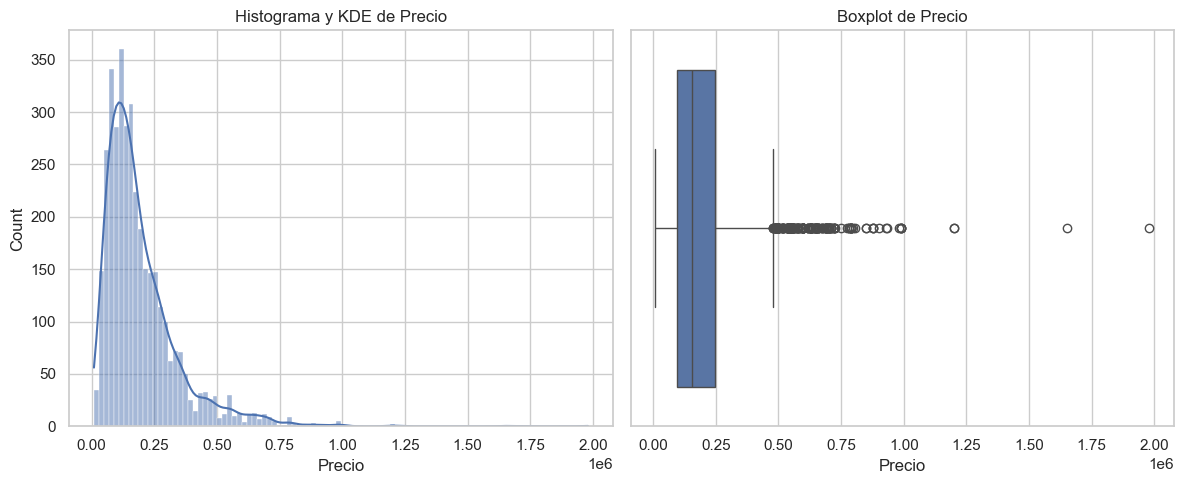

In [7]:
# -----------------------------------------
# VISUALIZACIONES
# -----------------------------------------

# Visualizar la distribución del precio
plot_combined_graphs(df, ['Precio'])


--- Análisis de Tipo de inmueble ---


,mean,median,count
Tipo de inmueble,,,
Casa Rural,338443.888889,239995.0,9
Ático,279785.503030,235000.0,165
Duplex,255611.055901,205000.0,161
Piso,187629.652711,150000.0,3320
Chalet,138765.173913,120000.0,23


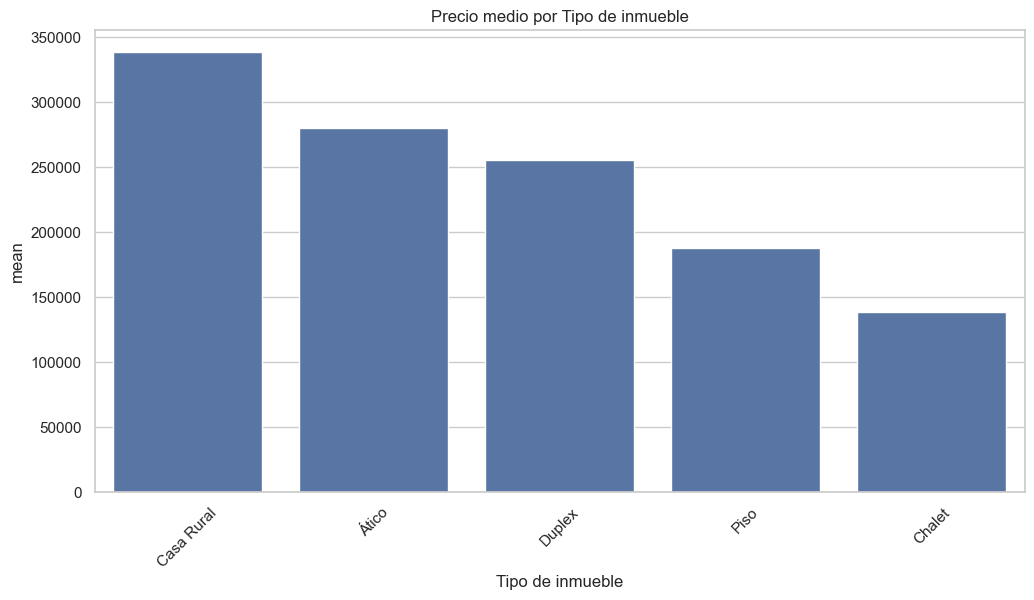


--- Análisis de Tipo de vendedor ---


,mean,median,count
Tipo de vendedor,,,
Profesional,207635.271082,165000.0,2929
Particular,144622.590120,117000.0,749


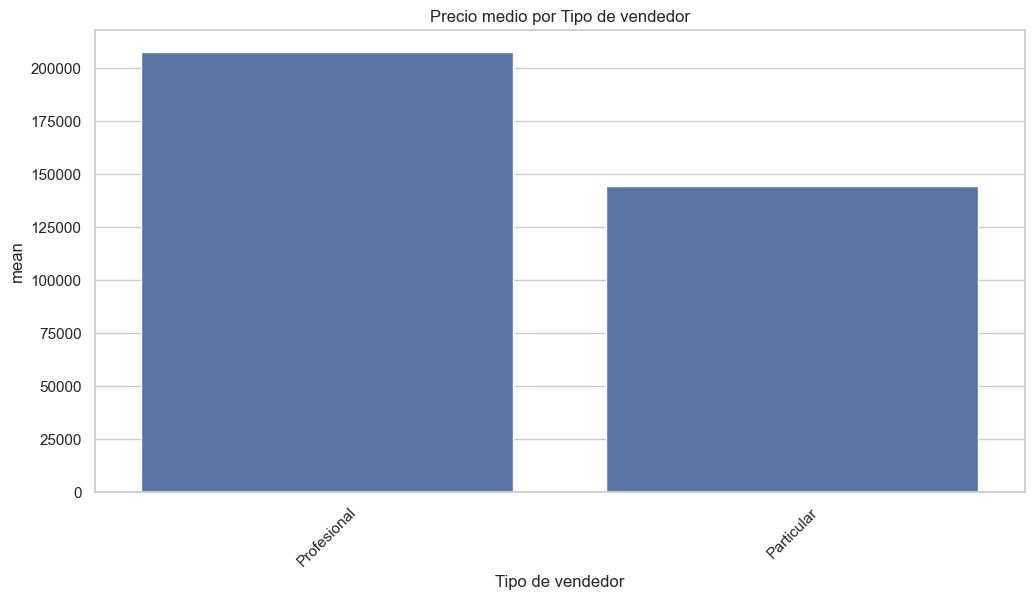

In [8]:
# Analizar la relación entre variables categóricas y el precio
for col in ['Tipo de inmueble', 'Tipo de vendedor']:
    print(f"\n--- Análisis de {col} ---")
    grouped = df.groupby(col)['Precio'].agg(['mean', 'median', 'count']).sort_values(by='mean', ascending=False)
    display(grouped.head(10))
    
    # Visualización
    plt.figure(figsize=(12, 6))
    sns.barplot(x=grouped.index[:10], y=grouped['mean'][:10])
    plt.xticks(rotation=45)
    plt.title(f"Precio medio por {col}")
    plt.show()

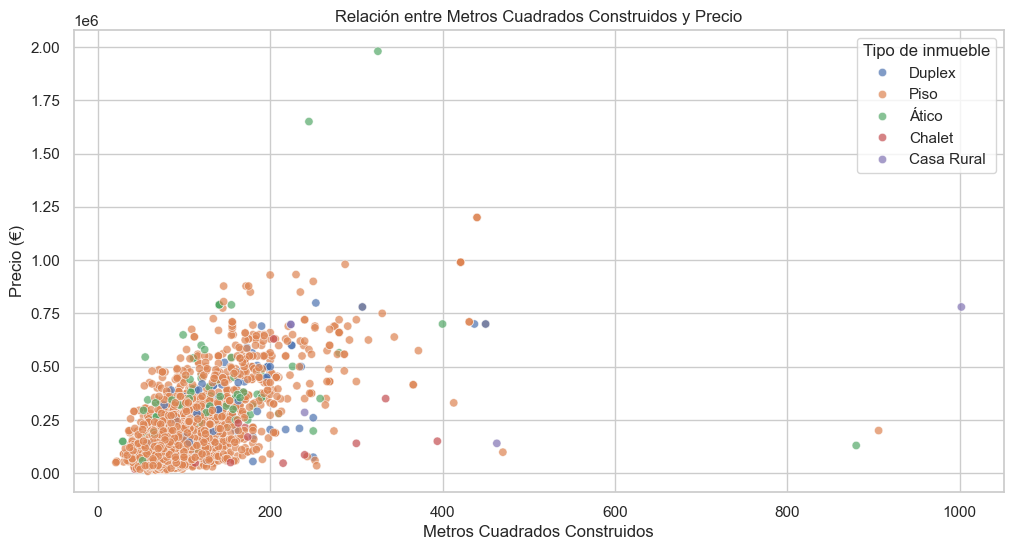

In [9]:
# Scatter plot para metros cuadrados vs precio
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Metros cuadrados construidos', y='Precio', hue='Tipo de inmueble', alpha=0.7)
plt.title("Relación entre Metros Cuadrados Construidos y Precio")
plt.xlabel("Metros Cuadrados Construidos")
plt.ylabel("Precio (€)")
plt.show()

In [10]:
# Pairplot para variables numéricas relevantes
# sns.pairplot(df[['Precio', 'Euros/m2', 'Metros cuadrados construidos', 'Habitaciones', 'Baños']])
# plt.show()

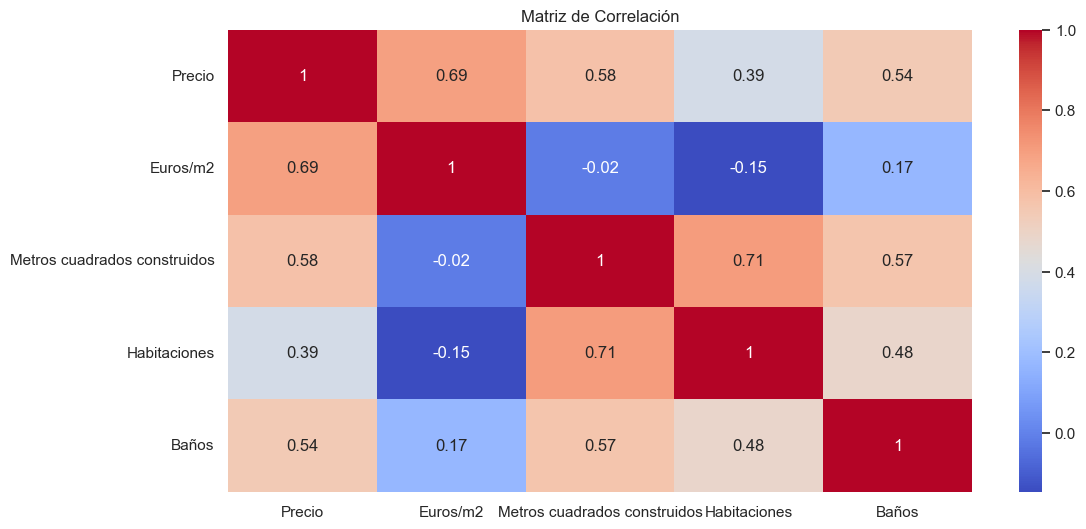

In [11]:
corr_matrix = df[['Precio', 'Euros/m2', 'Metros cuadrados construidos', 'Habitaciones', 'Baños']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Matriz de Correlación")
plt.show()

In [12]:
# -----------------------------------------
# ANÁLISIS GEOESPACIAL
# -----------------------------------------
import folium
from folium.plugins import HeatMap

# Crear un mapa centrado en Asturias
m = folium.Map(location=[43.3672, -5.8502], zoom_start=10)

# Limpiar y convertir Latitud y Longitud
df['Latitud'] = df['Latitud'].str.replace(',', '.', regex=False)
df['Longitud'] = df['Longitud'].str.replace(',', '.', regex=False)
df['Latitud'] = pd.to_numeric(df['Latitud'], errors='coerce')
df['Longitud'] = pd.to_numeric(df['Longitud'], errors='coerce')

# Eliminar filas con valores nulos en Latitud o Longitud
df = df.dropna(subset=['Latitud', 'Longitud'])

# Añadir puntos de calor (Heatmap)
heat_data = [[row['Latitud'], row['Longitud'], row['Precio']] for index, row in df.iterrows()]
HeatMap(heat_data).add_to(m)

# Guardar el mapa como archivo HTML
output_path = "../img/heatmap_precios.html"
m.save(output_path)
print("✅ Mapa de calor de precios guardado en ../src/img/heatmap_precios.html")

✅ Mapa de calor de precios guardado en ../src/img/heatmap_precios.html


In [13]:
from IPython.display import display
display(m)